# Title and introduction

# Libraries

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Data Loading and Exploration

In [5]:
data=pd.read_csv("./spam.csv",encoding="latin-1")

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# cheking the information of data
data[["v1","v2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


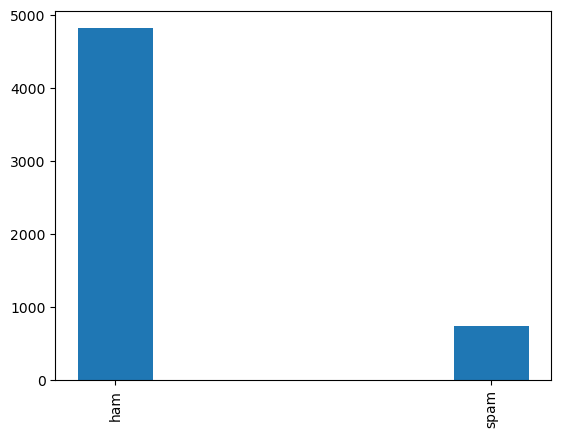

In [8]:
#visualizing the distribution of two categories
x=data.v1.value_counts().index
y=data.v1.value_counts().values
plt.bar(x,y,width=.2)
plt.xticks(rotation=90)
plt.show()

In [9]:
train,test=train_test_split(data[["v1","v2"]],test_size=.2,stratify=data.v1)

In [10]:
train.v1.value_counts()

ham     3859
spam     598
Name: v1, dtype: int64

In [11]:
test.v1.value_counts()

ham     966
spam    149
Name: v1, dtype: int64

# Preprocessing

# feature extraction


In [12]:
prepross=Pipeline([("tokenizer",CountVectorizer(analyzer="word",ngram_range=(1,1),max_df=.9))])

In [13]:
array=OrdinalEncoder()
train["class"]=np.int0(array.fit_transform(train[["v1"]])).reshape(4457)
train

,v1,v2,class
1073,ham,Lul im gettin some juicy gossip at the hospita...,0
2541,ham,I dont. Can you send it to me. Plus how's mode.,0
2744,ham,"Tick, tick, tick ... Babe",0
2309,ham,"I have 2 sleeping bags, 1 blanket and paper an...",0
732,ham,Lol you won't feel bad when I use her money to...,0
...,...,...,...
1781,ham,";-( oh well, c u later",0
5042,ham,O ic lol. Should play 9 doors sometime yo,0
359,ham,"Hello! Just got here, st andrews-boy its a lon...",0
4273,ham,Ball is moving a lot.will spin in last :)so ve...,0


# Select and Train a Model

# 1-k nearest neighbors


In [14]:
KNN=make_pipeline(prepross,KNeighborsClassifier(n_neighbors=1))

In [15]:
KNN.fit(train["v2"],train["class"])

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('tokenizer', CountVectorizer(max_df=0.9))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [16]:
#cross_val_predict split the dataset into multiple subsets or folds and then training and evaluating the model multiple times, each time using a different subset as the test set

In [17]:
pre_knn=cross_val_predict(KNN,train["v2"],train["class"],cv=4)
pre_knn

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [18]:
confusion_matrix(train["class"],pre_knn)

array([[3857,    2],
       [ 228,  370]], dtype=int64)

In [19]:
pre_knn

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [20]:
recall_score(train[["class"]],pre_knn)

0.6187290969899666

In [21]:
precision_score(train[["class"]],pre_knn)

0.9946236559139785

In [22]:
f1_score(train[["class"]],pre_knn)

0.7628865979381443

# 2- NEURAL NETWORK

In [23]:
neural_net1=make_pipeline(prepross,MLPClassifier(hidden_layer_sizes=[100],activation="tanh",solver="sgd",batch_size=10,learning_rate='constant',learning_rate_init=0.09))

In [24]:
neural_net1.fit(train["v2"],train["class"])

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('tokenizer', CountVectorizer(max_df=0.9))])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', batch_size=10,
                               hidden_layer_sizes=[100],
                               learning_rate_init=0.09, solver='sgd'))])

In [25]:
y_pre1=cross_val_predict(neural_net1,train["v2"],train["class"],cv=4)
y_pre1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
confusion_matrix(train["class"],y_pre1)

array([[3848,   11],
       [  60,  538]], dtype=int64)

In [27]:
recall_score(train["class"],y_pre1)

0.8996655518394648

In [28]:
precision_score(train["class"],y_pre1)

0.9799635701275046

# 3-Logistic regression

In [29]:
logistic_regression=make_pipeline(prepross,LogisticRegression(penalty="l2",max_iter=100,multi_class="ovr",solver="liblinear"))
logistic_regression.fit(train["v2"],train["class"])

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('tokenizer', CountVectorizer(max_df=0.9))])),
                ('logisticregression',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])

In [30]:
y_pre=cross_val_predict(logistic_regression,train["v2"],train["class"],cv=4)
y_pre


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
confusion_matrix(train["class"],y_pre)

array([[3850,    9],
       [  75,  523]], dtype=int64)

In [32]:
recall_score(train["class"],y_pre)

0.8745819397993311

In [33]:
precision_score(train["class"],y_pre)

0.9830827067669173

In [34]:
f1_score(train["class"],y_pre)

0.9256637168141594

# 4-ensemble voting

In [35]:
models=[("knn",KNN),("logitic",logistic_regression),("NN",neural_net1)]
ensemble=VotingClassifier(estimators=models)
ensemble.fit(train["v2"],train["class"])

VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('tokenizer',
                                                                CountVectorizer(max_df=0.9))])),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=1))])),
                             ('logitic',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('tokenizer',
                                                                CountVectorizer(max_df=0.9))])),
                                              ('logisticregression',
                                               LogisticRegression(multi_class='ovr',
                                                                  solver='liblinear'))])),
                             ('NN',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('tokenizer',
                                                                CountVectorizer(max_df=0.9))])),
                                              ('mlpclassifier',
                                               MLPClassifier(activation='tanh',
                                                             batch_size=10,
                                                             hidden_layer_sizes=[100],
                                                             learning_rate_init=0.09,
                                                             solver='sgd'))]))])

In [36]:
result=cross_val_predict(ensemble,train["v2"],train["class"],cv=4)

In [37]:
confusion_matrix(train["class"],result)

array([[3852,    7],
       [  76,  522]], dtype=int64)

In [38]:
f1_score(train["class"],result)

0.9263531499556344

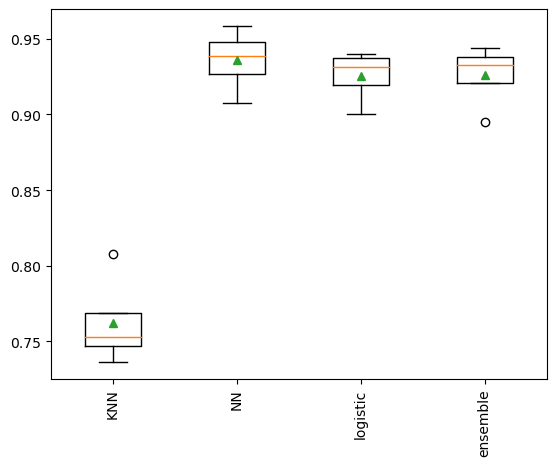

In [39]:
f_result=[cross_val_score(KNN,train["v2"],train["class"],cv=4,scoring="f1"),cross_val_score(neural_net1,train["v2"],train["class"],cv=4,scoring="f1"),cross_val_score(logistic_regression,train["v2"],train["class"],cv=4,scoring="f1"),cross_val_score(ensemble,train["v2"],train["class"],cv=4,scoring="f1")]
plt.boxplot(f_result,labels=["KNN","NN","logistic","ensemble"],showmeans=True)
plt.xticks(rotation=90)
plt.show()

# Evaluating model on test data

In [40]:
pre_nn=neural_net1.predict(test["v2"])

In [41]:
pre_nn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
test["class"]=np.int0(array.fit_transform(test[["v1"]])).reshape(1115)

In [43]:
f1_score(test["class"],pre_nn)

0.9366197183098592

# Saving the training model

In [44]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(neural_net1,f)